## Wahid Yaminsyah Putra 202231040

### Deteksi Garis Dan Tepi

In [8]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import skimage


In [9]:
image = cv2.imread('2.jpg')

In [10]:
cv2.imshow("Gambar parkir",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Menampilkan Tepi Pada Gambar

In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image, 100, 150)

In [12]:
cv2.imshow("Gambar parkir",edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Gambar Yang Udah')

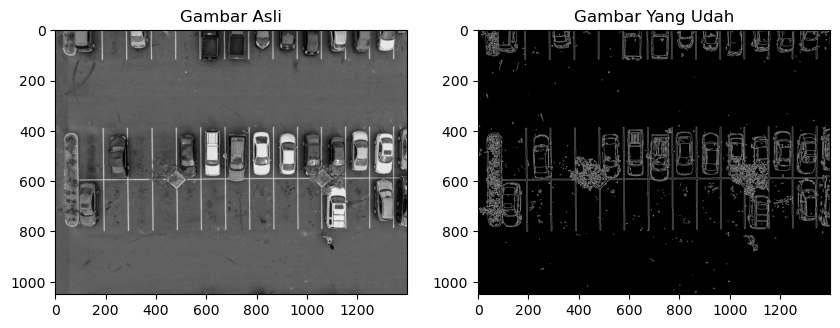

In [13]:
fig,axs = plt.subplots(1,2,figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(gray, cmap = "gray")
ax[0].set_title("Gambar Asli")

ax[1].imshow(edges, cmap ="gray")
ax[1].set_title("Gambar Yang Udah")

### Menampilkan Garis Pada Gambar

In [14]:
lines =  cv2.HoughLinesP(edges,1,np.pi/180,30,maxLineGap=250)
image_line = image.copy()

In [15]:
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(image_line,(x1,y1),(x2,y2),(0,0,225),1)

Text(0.5, 1.0, 'Gambar Yang Udah')

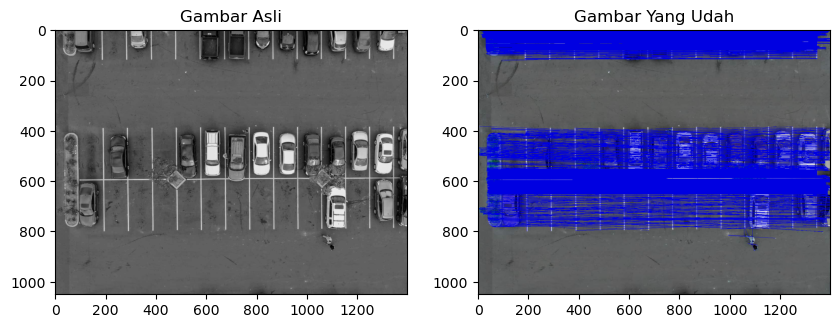

In [16]:
fig,axs = plt.subplots(1,2,figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(gray, cmap = "gray")
ax[0].set_title("Gambar Asli")

ax[1].imshow(image_line, cmap="gray")
ax[1].set_title("Gambar Yang Udah")

In [17]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import skimage


In [18]:
daun = cv2.imread("daun.jpg",0)
tinggi,lebar = daun.shape

In [19]:
cv2.imshow("Gambar Daun",daun)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Memperkirakan Nilai Ambang

In [20]:
nilai_ambang = 131
daun_hasil = daun.copy()
for x in range(tinggi):
    for y in range(lebar): 
        if daun[x,y] < nilai_ambang:
            daun_hasil[x,y] = 0
        else: 
            daun_hasil[x,y]=255


In [24]:
cv2.imshow("Gambar Daun",daun_hasil)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
def titeratif(image):
    tinggi,lebar=image.shape
    t0=127
    while(True):
        rata_kiri=0;
        rata_kanan=0;
        jum_kiri=0; 
        jum_kanan=0;
        for x in range(tinggi):
            for y in range(lebar):
                if (image[x,y] <= 127):
                    rata_kiri = rata_kiri + image[x,y]
                    jum_kiri = jum_kiri +1
                else:
                    rata_kanan = rata_kanan + image[x,y]
                    jum_kanan = jum_kanan+1

        rata_kiri = rata_kiri/jum_kiri
        rata_kanan = rata_kanan/jum_kanan
        t1 = (rata_kiri +rata_kanan)/2
        if((t0-t1)<1 ):
            break
        t0-t1
    return round(t1)


In [23]:
titeratif(daun)

131

In [25]:
jamak = cv2.imread("arasjamak.jpg",0)
tinggi,lebar = jamak.shape

In [26]:
def arasjamak(image,t1,t2):
    res=image
    m,n=image.shape
    for x in range (m):
        for y in range (n):
            if (image[x,y] <= t1) or (image[x,y] >= t2) :
                res[x,y]=0
            else :
                res[x,y] = 255
    return res

In [27]:
daunarasjamak = arasjamak(jamak,185,200)

In [28]:
cv2.imshow("gambar daun",daunarasjamak)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Ekstraksi Fitur

In [29]:
import cv2
import matplotlib.pyplot as plt
import skimage.io
import numpy as np
from skimage.feature import graycomatrix, graycoprops


In [30]:
# Baca gambar dari file
img = skimage.io.imread('2.jpg')

In [31]:
# Konversi gambar dari RGB ke HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [32]:
# Ekstraksi kanal V dari gambar HSV
img_v = img_hsv[:, :, 2]

In [33]:
# Gray level Co-occurrence Matrix (GLCM) pada kanal V
glcm = graycomatrix(img_v, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

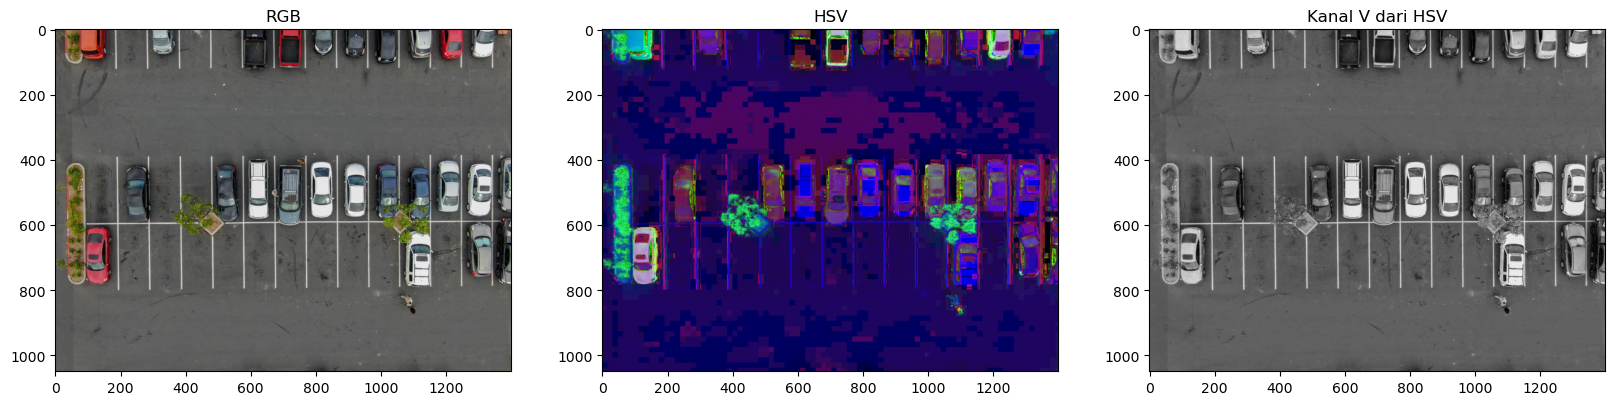

In [34]:
# Plot gambar RGB dan HSV
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

ax = axs.ravel()

ax[0].imshow(img)
ax[0].set_title("RGB")

ax[1].imshow(img_hsv)
ax[1].set_title("HSV")

ax[2].imshow(img_v, cmap='gray')
ax[2].set_title("Kanal V dari HSV")

plt.show()

In [35]:
# Menghitung properti GLCM
contrast = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]
ASM = graycoprops(glcm, 'ASM')[0, 0]

In [36]:
# Print GLCM properties
print(f"Contrast: {contrast}")
print(f"Dissimilarity: {dissimilarity}")
print(f"Homogeneity: {homogeneity}")
print(f"Energy: {energy}")
print(f"Correlation: {correlation}")
print(f"ASM: {ASM}")

Contrast: 144.2264957963171
Dissimilarity: 4.213531434017495
Homogeneity: 0.580994169280309
Energy: 0.13024436334682196
Correlation: 0.9370298229041955
ASM: 0.01696359418361898
